# **Finding Correlation**


## Objectives


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [ ]:
#Create the dataframe
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

#Display the top 10 records
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


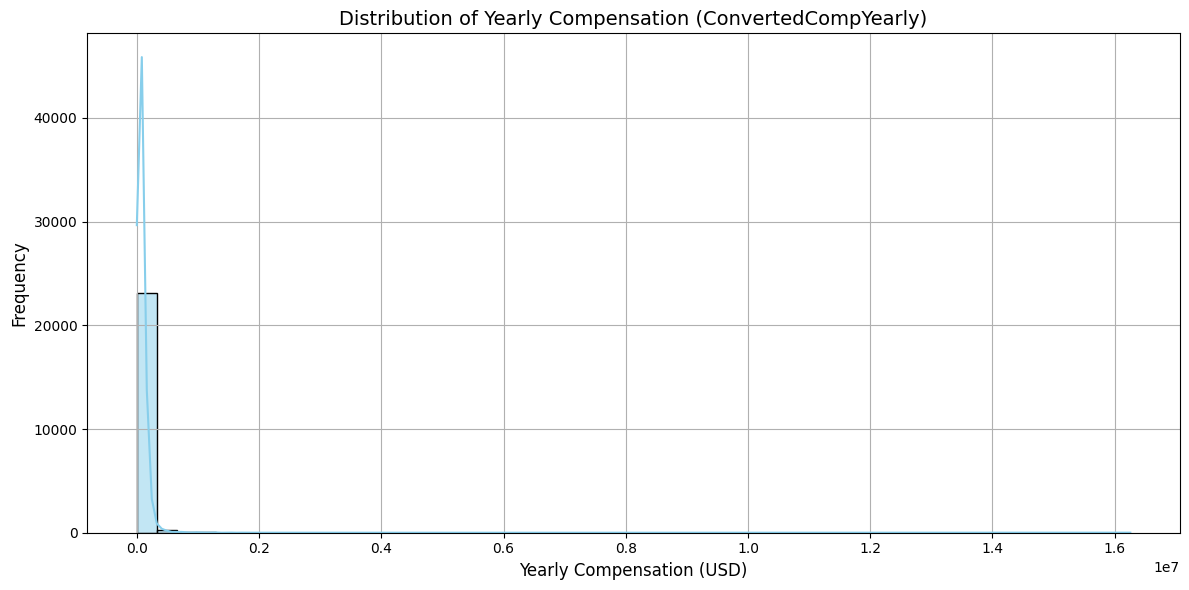

In [ ]:
## Write your code here
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].dropna()

# Plot histogram and KDE
plt.figure(figsize=(12, 6))
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)', fontsize=14)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [ ]:
## Write your code here
full_time_df = df[df['Employment'] == 'Employed, full-time']

full_time_comp = full_time_df['ConvertedCompYearly'].dropna()

median_full_time_comp = full_time_comp.median()

print("Median Yearly Compensation for Full-Time Employees: ${:,.2f}".format(median_full_time_comp))

Median Yearly Compensation for Full-Time Employees: $69,814.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



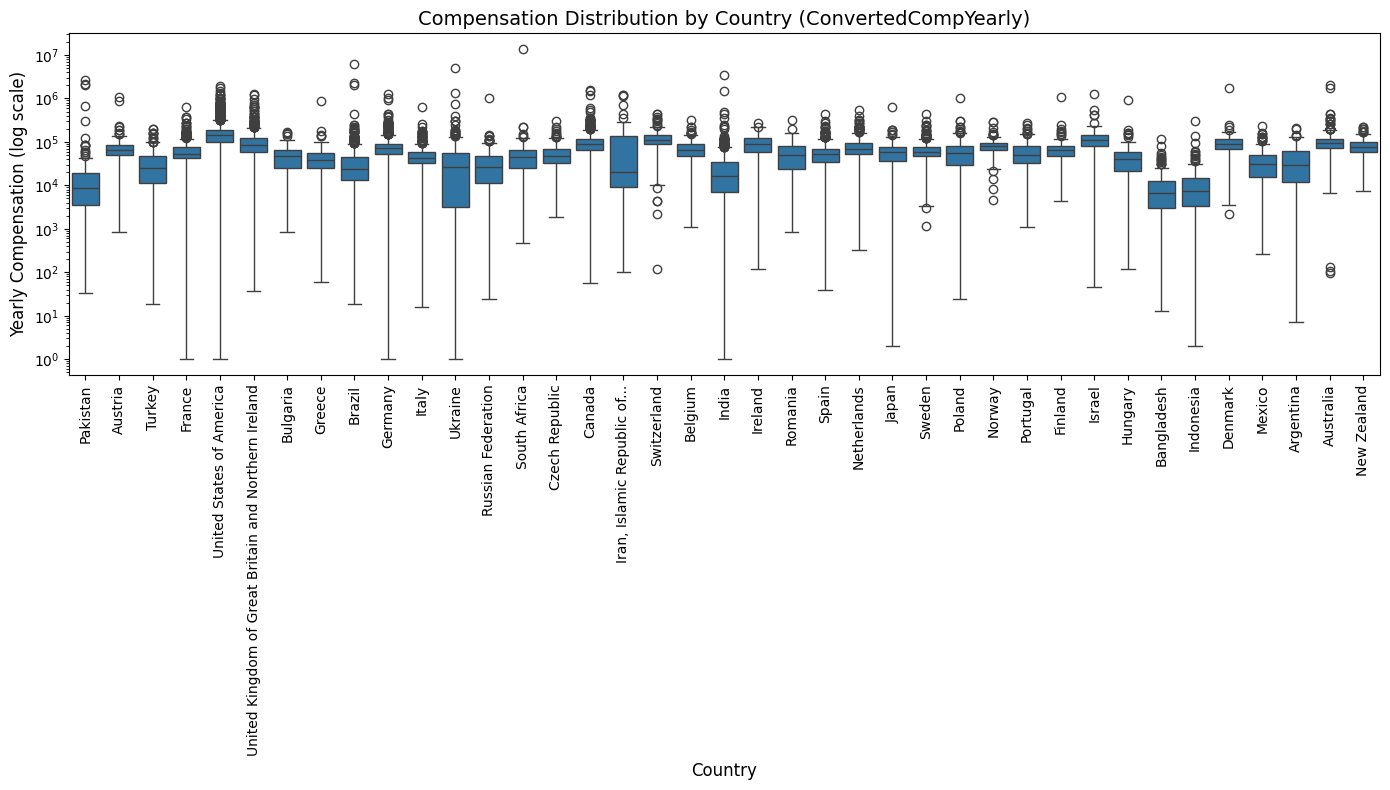

In [ ]:
## Write your code here
df_filtered = df[['Country', 'ConvertedCompYearly']].dropna()

country_counts = df_filtered['Country'].value_counts()
valid_countries = country_counts[country_counts >= 100].index
df_filtered = df_filtered[df_filtered['Country'].isin(valid_countries)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_filtered, x='Country', y='ConvertedCompYearly')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Compensation Distribution by Country (ConvertedCompYearly)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Yearly Compensation (log scale)', fontsize=12)
plt.tight_layout()
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [ ]:
## Write your code here
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Show size of refined DataFrame
print(f"Original dataset size: {df.shape[0]}")
print(f"Refined dataset size (no outliers): {df_no_outliers.shape[0]}")

Original dataset size: 65437
Refined dataset size (no outliers): 22457


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


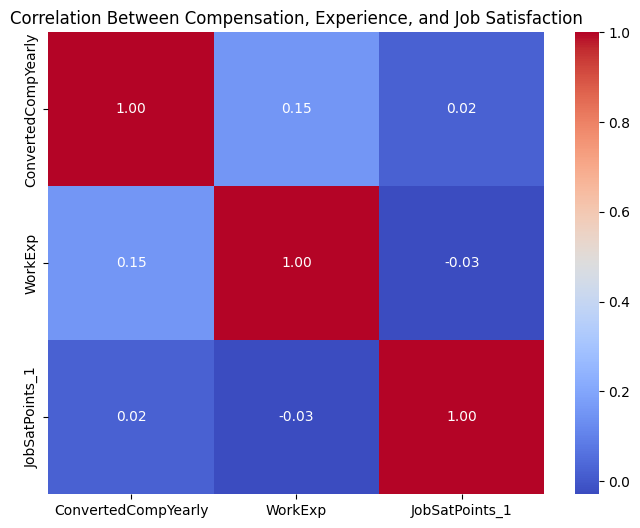

In [ ]:
## Write your code here
cols = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df_corr = df[cols].dropna()

corr_matrix = df_corr.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Compensation, Experience, and Job Satisfaction')
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


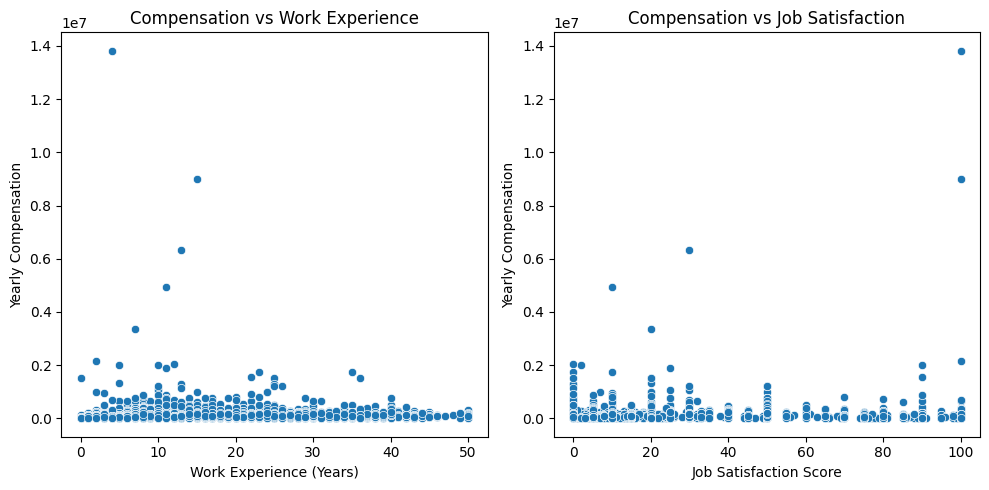

In [ ]:
## Write your code here
df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']] = df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].dropna()

# Plot 1: Compensation vs Work Experience
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']], x='WorkExp', y='ConvertedCompYearly')
plt.title('Compensation vs Work Experience')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Yearly Compensation')

# Plot 2: Compensation vs Job Satisfaction
plt.subplot(1, 2, 2)
sns.scatterplot(data=df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']], x='JobSatPoints_1', y='ConvertedCompYearly')
plt.title('Compensation vs Job Satisfaction')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Yearly Compensation')

plt.tight_layout()
plt.show()